In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import menpo.io as mio
from conversion import landmarkConverter
from setup import process, prepare_images
from os import walk
%matplotlib inline

In [2]:
training_images = prepare_images('/Data/Images/042-ll042/')

Found 187 assets, index the returned LazyList to import.
Found 168 assets, index the returned LazyList to import.
Found 143 assets, index the returned LazyList to import.
Found 350 assets, index the returned LazyList to import.
Found 320 assets, index the returned LazyList to import.
Found 155 assets, index the returned LazyList to import.
Found 128 assets, index the returned LazyList to import.
Found 683 assets, index the returned LazyList to import.


In [3]:
from menpofit.aam import HolisticAAM
from menpo.feature import fast_dsift
from menpo.shape import TriMesh
import numpy as np

aam = HolisticAAM(training_images, group='landmarks', diagonal=150,
                  scales=(0.5, 1.0), holistic_features=fast_dsift, verbose=True,
                  max_shape_components=20, max_appearance_components=150)

- Computing reference shape                                                     Computing batch 0
- Building modelsges size: [==========] 100% (2134/2134) - done.                
  - Scale 0: Warping images: [          ] 3% (70/2134) - 00:00:03 remaining     maining

/home/ch283/anaconda3/envs/menpo/lib/python3.5/site-packages/menpofit/builder.py:338: MenpoFitModelBuilderWarning: The reference shape passed is not a TriMesh or subclass and therefore the reference frame (mask) will be calculated via a Delaunay triangulation. This may cause small triangles and thus suboptimal warps.
  MenpoFitModelBuilderWarning)
/home/ch283/anaconda3/envs/menpo/lib/python3.5/site-packages/menpo/image/boolean.py:711: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  copy.pixels[slices].flat = point_in_pointcloud(pointcloud, indices)


  - Scale 0: Doneding appearance model                                          
  - Scale 1: Doneding appearance model                                          
                                                              

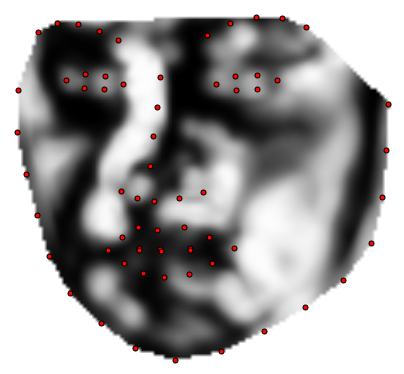

In [4]:
aam.view_appearance_models_widget()

In [5]:
app = aam.appearance_models[-1]
capp = app.mean()

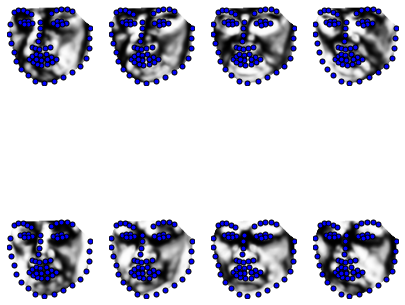

In [6]:
capp.view_landmarks()